In [3]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN, KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import datasets, linear_model, metrics
import matplotlib.pyplot as plt

%matplotlib inline 

## 1. Load and format the data

We're going to load the iris data from the scikit "datasets" package

In [4]:
iris = datasets.load_iris()

#### 1.1 Define the variables

Define your "X" and "y" variables for the analysis

In [5]:
X, y = iris.data, iris.target

#### 1.2 Standardize X 

In [6]:
X = StandardScaler().fit_transform(X)

## Visualize the Data

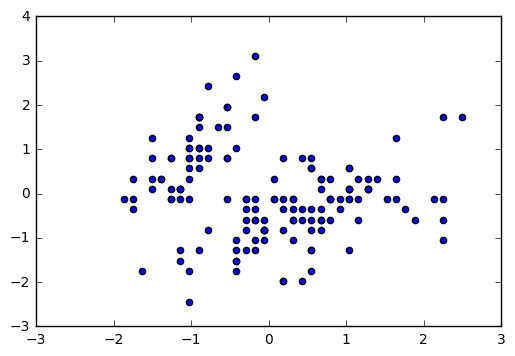

In [7]:
plt.scatter(X[:,0], X[:,1])

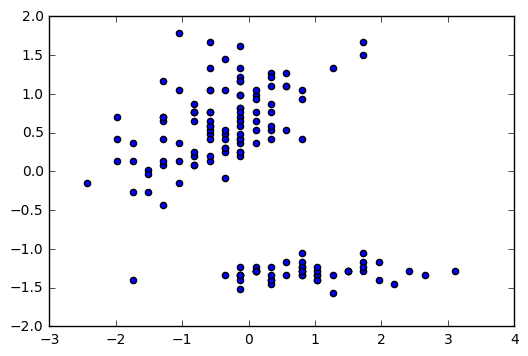

In [8]:
plt.scatter(X[:,1], X[:,2])

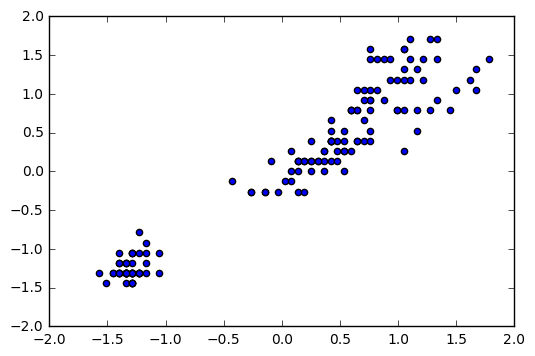

In [9]:
plt.scatter(X[:,2], X[:,3])

We can begin to see that there are two definitive clusters 

## 3. DBSCAN

#### 3.1 Setup the DBSCAN from scikit

Let's set up the DBSCAN from scikit using an epsilon of .5 and a minimum sample number of 5

In [10]:
dbscn = DBSCAN(eps = .5, min_samples = 5).fit(X)  

#### 3.2 Labels

Next, we'll find the labels calculated by DBSCAN

In [11]:
labels = dbscn.labels_  

In [12]:
print(labels)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1  0  0  0  0  0  0 -1  0  0
  0  0  0  0  0  0  0 -1 -1  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0
  1  1  1  1  1  1 -1 -1  1 -1 -1  1 -1  1  1  1  1  1 -1  1  1  1 -1  1  1
  1  1  1  1  1  1  1  1  1  1 -1  1 -1  1  1  1  1  1 -1  1  1  1  1 -1  1
 -1  1  1  1  1 -1 -1 -1 -1 -1  1  1  1  1 -1  1  1 -1 -1 -1  1  1 -1  1  1
 -1  1  1  1 -1 -1 -1  1  1  1 -1 -1  1  1  1  1  1  1  1  1  1  1  1 -1  1]


**What information can we derive from the lables?**: The negative one labels are assigned to noisy samples 

In [13]:
core_samples = np.zeros_like(labels, dtype = bool)  
core_samples[dbscn.core_sample_indices_] = True 

In [14]:
print(core_samples)

[ True  True  True  True  True  True  True  True False  True  True  True
  True False False False False  True False  True  True  True False  True
  True  True  True  True  True  True  True  True False False  True  True
  True  True  True  True  True False  True  True  True  True  True  True
  True  True False False  True False  True  True False False  True False
 False  True False  True  True  True  True  True False  True False  True
 False  True  True  True False  True  True  True  True  True  True  True
 False False  True False  True  True  True  True  True False  True  True
  True  True False  True False  True False  True  True False False False
 False False  True  True  True False False False  True False False False
  True False False  True False False  True False False False False False
 False  True False False False  True  True  True  True  True  True  True
 False  True False  True False False]


In [15]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

Now, we can use a handy chunk of code from the Scitkit documentation to measure the performance of our model 

In [16]:
print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, labels))
print("Completeness: %0.3f" % metrics.completeness_score(y, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(y, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(y, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(y, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

Estimated number of clusters: 2
Homogeneity: 0.489
Completeness: 0.510
V-measure: 0.500
Adjusted Rand Index: 0.428
Adjusted Mutual Information: 0.483
Silhouette Coefficient: 0.349


**What do these metrics tell us?**

#### 3.3 Plot the resulting clusters

In [17]:
unique_labels = np.unique(labels)
colors = plt.cm.Spectral(np.linspace(0,1, len(unique_labels)))

/Users/basilbeirouti/miniconda3/envs/dsienv/lib/python2.7/site-packages/matplotlib/lines.py:1145: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self._markerfacecolor != fc:


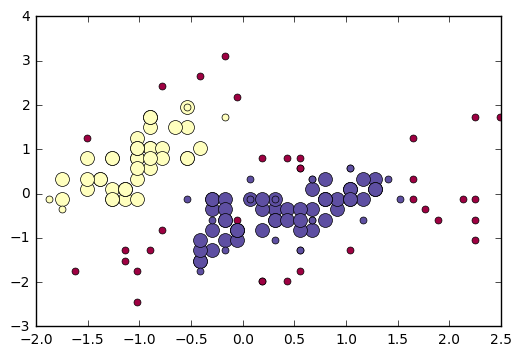

In [18]:
for (label, color) in zip(unique_labels, colors):
    class_member_mask = (labels == label)
    n = X[class_member_mask & core_samples]
    plt.plot(n[:,0],n[:,1], 'o', markerfacecolor = color, markersize = 10)
    
    n = X[class_member_mask & ~core_samples]
    plt.plot(n[:,0],n[:,1], 'o', markerfacecolor = color, markersize = 5)